# Titanic - Machine Learning from Disaster

Developed by [André Moreira](https://github.com/moreira-and)

Based on the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology

Each subtopic will discuss a step of this methodology.

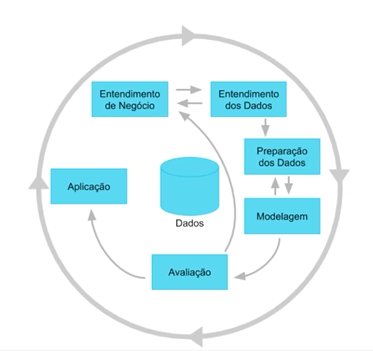

## 1. Entendimento do Negócio (Business Understanding)

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Entendimento dos Dados (Data Understanding)
| Variable  | Definition                                     | Key                               |
|-----------|------------------------------------------------|-----------------------------------|
| survival  | Survival                                       | 0 = No, 1 = Yes                   |
| pclass    | Ticket class                                   | 1 = 1st, 2 = 2nd, 3 = 3rd         |
| sex       | Sex                                            |                                   |
| Age       | Age in years                                   |                                   |
| sibsp     | # of siblings / spouses aboard the Titanic     |                                   |
| parch     | # of parents / children aboard the Titanic     |                                   |
| ticket    | Ticket number                                  |                                   |
| fare      | Passenger fare                                 |                                   |
| cabin     | Cabin number                                   |                                   |
| embarked  | Port of Embarkation                            | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes:
- **pclass**: A proxy for socio-economic status (SES)  
  - 1st = Upper  
  - 2nd = Middle  
  - 3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- **sibsp**: The dataset defines family relations in this way...  
  - Sibling = brother, sister, stepbrother, stepsister  
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: The dataset defines family relations in this way...  
  - Parent = mother, father  
  - Child = daughter, son, stepdaughter, stepson  
  - Some children traveled only with a nanny, therefore `parch=0` for them.

## 3. Preparação dos Dados (Data Preparation)

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Read data

In [2]:
df_train = pd.read_csv('../data/raw/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# This data will be used to test the model. It is important: DO NOT TRAIN WITH THIS DATA!
df_test_in = pd.read_csv('../data/raw/test.csv')
df_test_in.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# This data will be used to test the model. It is important: DO NOT TRAIN WITH THIS DATA!
df_test_out = pd.read_csv('../data/raw/gender_submission.csv')
df_test_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### EDA

- [Limpeza dos Dados]()


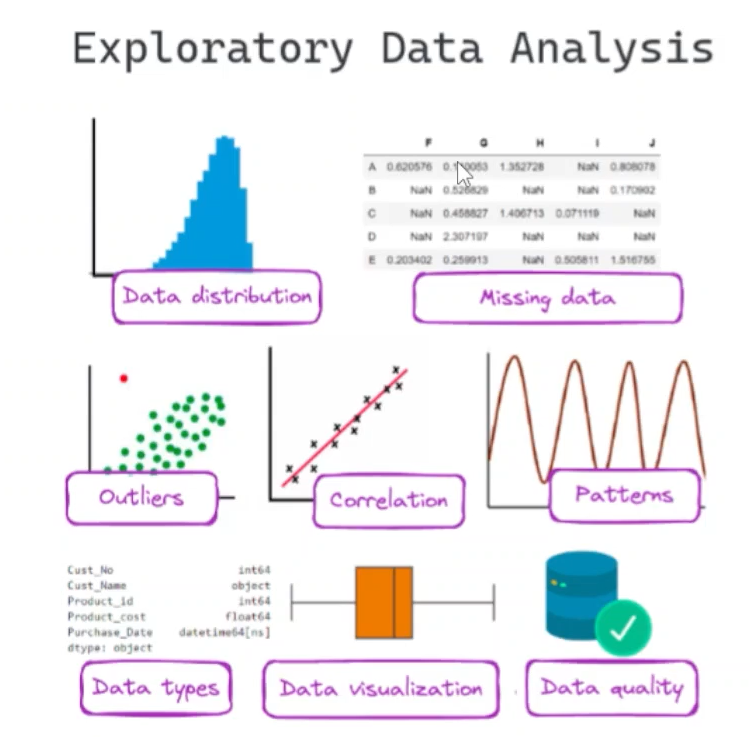

#### Cleaning

In [5]:
# Display DataFrame information
df_train.info()

# Look, we have columns with missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Find NA values
na_values = df_train.isna().sum()

# Identify columns with missing values
missing_columns = na_values[na_values > 0]
print("\n\nColumns with missing values:\n", missing_columns)



Columns with missing values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


Look, Cabin, Age, and Embarked have missing values; we need to work on these.
Next steps could include:
- [Filling missing values](#filling-missing-values)
- Dropping rows/columns
- Imputing values based on other data, such as the mean or median.

##### Filling missing values

In [7]:
df_train.head()
# Ok, let's take a look at the data. We will suppose some hypotheses:
# - Name and Ticket aren't important for causal effects and can be removed.
# PassengerId, Survived, Pclass, Cabin, and Embarked are categorical variables.
# - Cabin can be composed of a Embarkation.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# PassengerId, Survived, Pclass, Cabin, Sex and Embarked are categorical variables.
# Convert specified columns to categorical data type
df_train['PassengerId'] = df_train['PassengerId'].astype('category')
df_train['Survived'] = df_train['Survived'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Cabin'] = df_train['Cabin'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['Sex'] = df_train['Sex'].astype('category')

In [9]:
# Display descriptive statistics of the remaining columns
df_train.describe()


,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [10]:
# - Cabin can be composed of a ticket and Embarkation.
ticket_contingency_table = pd.crosstab(df_train['Pclass'],df_train['Cabin'])
ticket_contingency_table

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,2,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,1,0,4,0


In [11]:
# If we separe the letter and number, this pass a context?
df_train[['Cabin_l','Cabin_n']] = df_train['Cabin'].str.extract(r'([A-Za-z]+)(\d+)')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_l,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148


In [12]:
# The cabin can be associated with a ticket and embarkation.
ticket_contingency_table = pd.crosstab(df_train['Pclass'], df_train['Cabin_l'])
ticket_contingency_table
# We only have Pclass 1 in this DataFrame, so it will be difficult to define other classes. However, could the ticket be useful?

Cabin_l,A,B,C,D,E,F,G
Pclass,,,,,,,
1,15,47,59,29,25,0,0
2,0,0,0,1,4,8,0
3,0,0,0,0,4,1,7


In [13]:
ticket_contingency_table = pd.crosstab(df_train['Ticket'], df_train['Cabin'])
ticket_contingency_table
# Ticket is not useful for this modeling, and we can't use it to complement Cabin.

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Ticket,,,,,,,,,,,,,,,,,,,,,
110152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110465,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC/AH Basle 541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SC/Paris 2163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SOTON/O.Q. 392078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Is there a relationship between Cabin and Survived?
contingency_table = pd.crosstab(df_train['Survived'], df_train['Cabin_l'])
contingency_table
# Looking at the data, we see Cabins A, B, C, D, E, and G, but we don't have enough data to know if this is real.
# Additionally, we only have this data for the first class passengers. We will make a decision to remove this data from the training DataFrame.

Cabin_l,A,B,C,D,E,F,G
Survived,,,,,,,
0,8,12,24,7,8,2,5
1,7,35,35,23,25,7,2


In [15]:
# - Name, PassengerId, Ticket and Cabin aren't important for causal effects and can be removed.
# Drop the columns from the DataFrame
df_train.drop(columns=['Name','Ticket','Cabin_l','Cabin_n','Cabin','PassengerId'], inplace=True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [17]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Categorical analises

In [18]:
# Suppose X is your dataframe of categorical variables and y is your categorical target variable.
# If necessary, transform the categorical variables into numeric values using LabelEncoder.

# Initialize LabelEncoder to convert categorical variables to numeric
labelencoder = LabelEncoder()

df_transform = df_train.copy()

# Loop through all columns in df_train and apply the LabelEncoder to each column
# This will transform categorical values (like 'Male', 'Female', 'A', 'B', etc.) into numeric codes
for col in df_train.columns:
    df_transform[col] = labelencoder.fit_transform(df_transform[col])

# Perform the chi-squared test to assess the relationship between the features and the target variable 'Survived'
# The test is applied to 'Pclass', 'Sex', and 'Embarked' (independent variables), and 'Survived' (dependent variable)
chi2_values, p_values = chi2(df_transform[['Pclass', 'Sex', 'Embarked']], df_transform['Survived'])

# Output the p-values for each feature. 
# A low p-value (typically < 0.05) suggests a significant relationship between the feature and the target ('Survived')
print(p_values)

# Expected output: p-values for each feature (Pclass, Sex, Embarked).
# If p-values are small (e.g., < 0.05), the feature is likely important for predicting 'Survived'.


[1.58171493e-13 6.07783826e-22 1.78791305e-03]



#### Distribuction analisis

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [20]:
# Function to count outliers using the IQR method
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

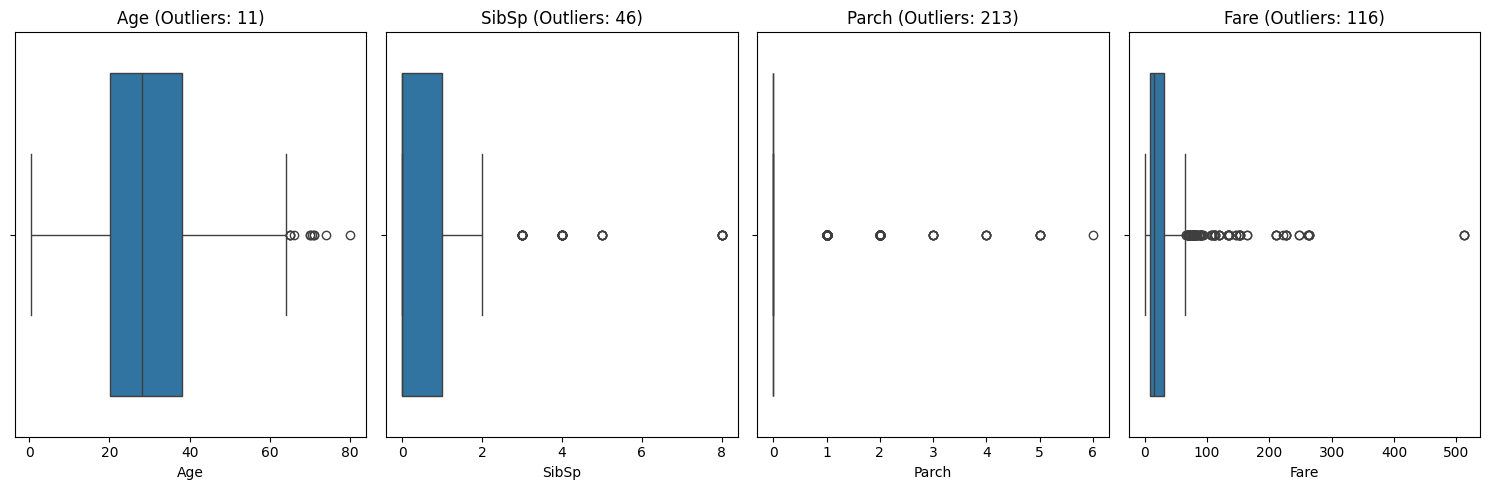

In [21]:
# List of columns to analyze
columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Create subplots for boxplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Loop through each column and create boxplots and count outliers
for ax, column in zip(axes, columns):
    sns.boxplot(data=df_train, x=column, ax=ax)
    outlier_count = count_outliers(df_train, column)
    ax.set_title(f'{column} (Outliers: {outlier_count})')

plt.tight_layout()
plt.show()

#### Hipoteses sobre os dados numéricos

- A variável "Age" (idade) apresenta alguns outliers acima do limite superior. Seria interessante analisar os dados por faixas etárias para verificar se alguma faixa específica teve uma taxa de sobrevivência maior.

- A variável "SibSp" (quantidade de familiares e pares a bordo) também contém alguns outliers acima do limite superior (valor 2), embora a maioria dos passageiros tenha 0 familiares a bordo. Seria útil investigar se há uma relação entre a quantidade de familiares e a sobrevivência, o que poderia simplificar o uso dessa variável.

- A variável "Patch" (quantidade de filhos a bordo) apresenta alguns outliers, principalmente a partir de 1, mas a maioria dos passageiros não tinha filhos a bordo. Podemos avaliar se faz sentido simplificar essa variável, dado que os dados se concentram em 0.

- A variável "Fare" (valor pago pela passagem) pode indicar a classe social dos passageiros, mas é importante verificar o impacto dessa variável na sobrevivência para decidir se ela deve ser incluída no modelo.


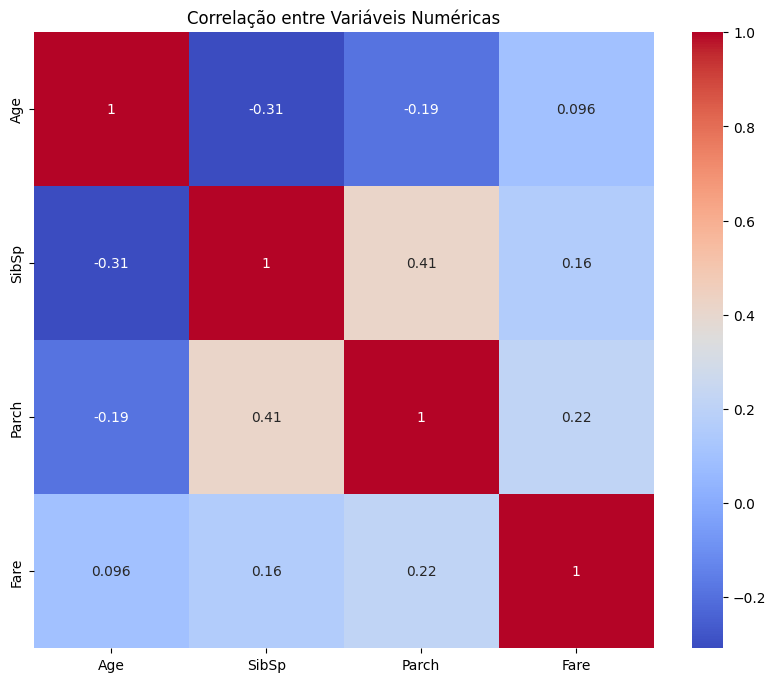

In [22]:
# Mapa de calor da correlação entre as variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

#### Correlation analisis between the nuberical variables

- "Age" possui correlação negativa com o número



##### "Age" (idade) 

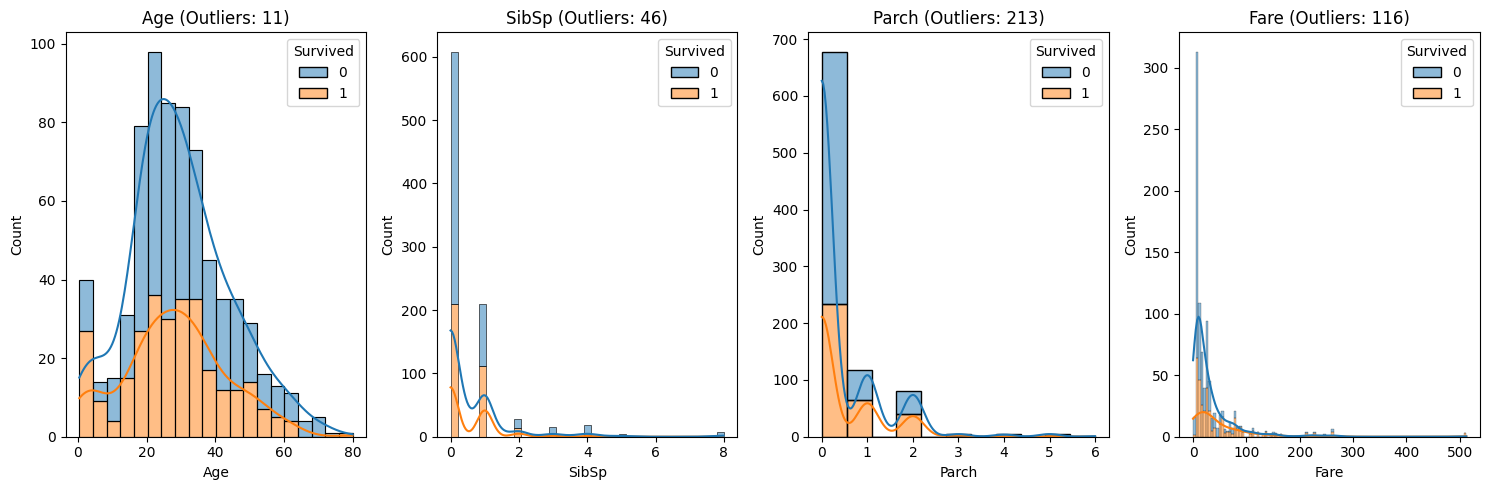

In [23]:
# List of columns to analyze
columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Create subplots for boxplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Loop through each column and create boxplots and count outliers
for ax, column in zip(axes, columns):
    sns.histplot(data=df_train, x=column, hue='Survived', ax=ax, multiple="stack", kde=True)
    outlier_count = count_outliers(df_train, column)
    ax.set_title(f'{column} (Outliers: {outlier_count})')

plt.tight_layout()
plt.show()

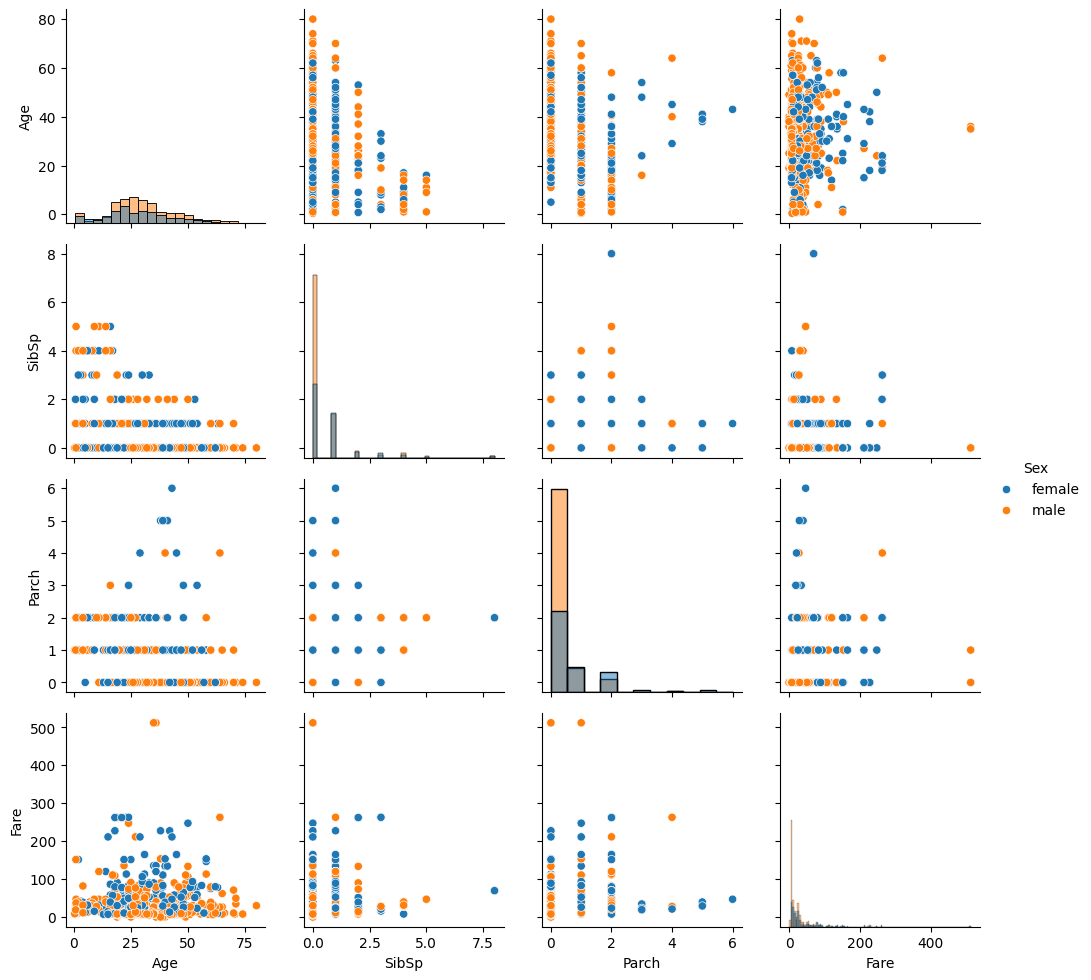

In [24]:
g = sns.PairGrid(df_train, vars=['Age', 'SibSp', 'Parch', 'Fare'], hue='Sex')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

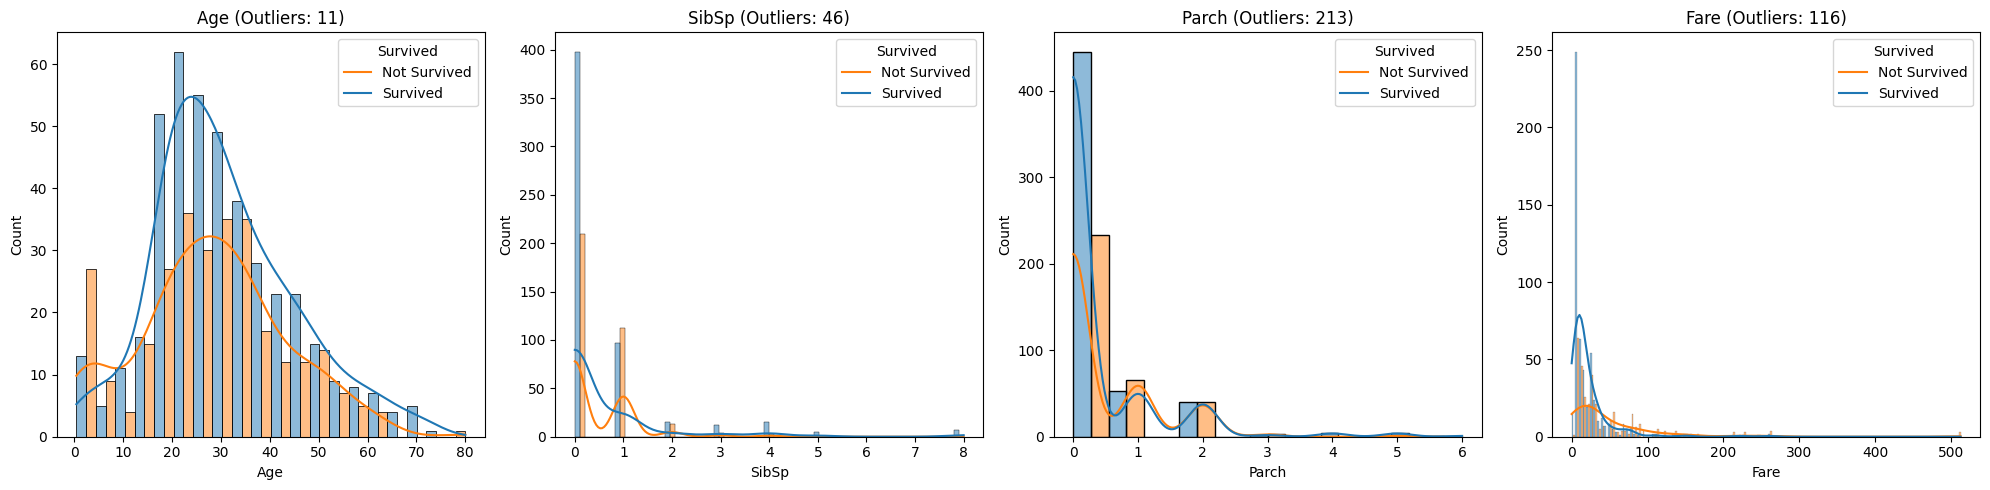

In [25]:
# List of columns to analyze
columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Create subplots for histograms
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))

# Loop through each column and create histograms
for ax, column in zip(axes, columns):
    # Create histogram for each column with separate columns for Survived
    sns.histplot(data=df_train, x=column, hue='Survived', ax=ax, multiple="dodge", kde=True)
    outlier_count = count_outliers(df_train, column)
    ax.set_title(f'{column} (Outliers: {outlier_count})')
    ax.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

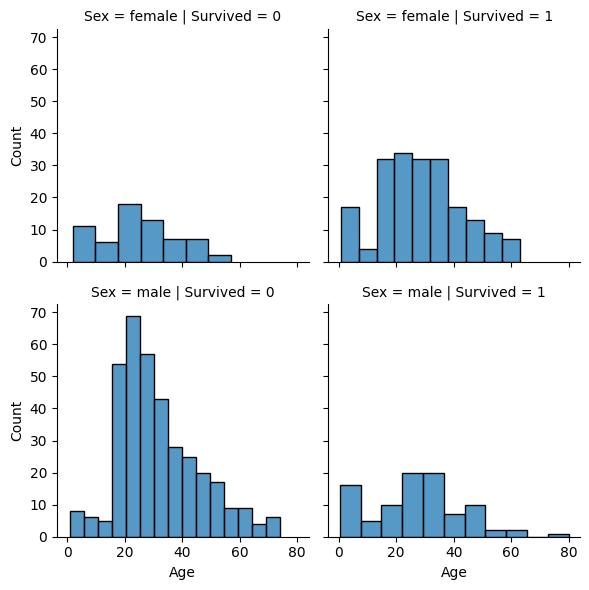

In [26]:
g = sns.FacetGrid(df_train, col="Survived",  row="Sex")
g.map_dataframe(sns.histplot, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

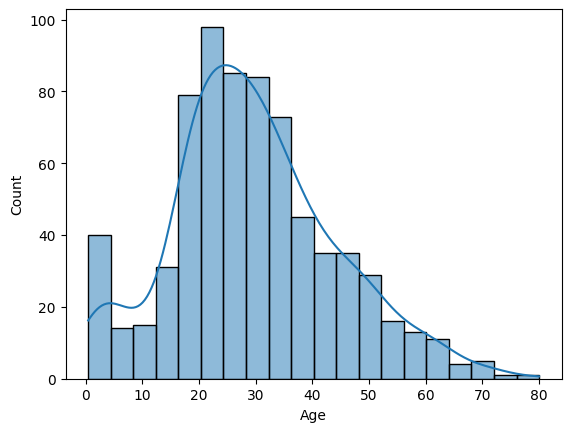

In [27]:
sns.histplot(data=df_train,x='Age',kde=True)

In [28]:
# Calculate the median of the Age column
age_median = df_train['Age'].median()

# Fill NaN values in the Age column with the median (without inplace)
df_train['Age'] = df_train['Age'].fillna(age_median)

df_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## 4. Modelagem (Modeling)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [30]:

# Loop through all columns in df_train and apply the LabelEncoder to each column
# This will transform categorical values (like 'Male', 'Female', 'A', 'B', etc.) into numeric codes
df_model = df_train.copy()
for col in df_model.columns:
    df_model[col] = labelencoder.fit_transform(df_model[col])

X, y = df_model[['Pclass','Sex','SibSp','Parch','Fare','Embarked']], df_model['Survived']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.46177171610169493, 0.9761904761904762, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.16875, 0.9285714285714286, 'x[0] <= 1.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.31526085805084747, 0.9523809523809523, 'True  '),
 Text(0.06440677966101695, 0.8809523809523809, 'x[4] <= 149.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.05084745762711865, 0.8333333333333334, 'x[4] <= 147.5\ngini = 0.18\nsamples = 70\nvalue = [7, 63]'),
 Text(0.04406779661016949, 0.7857142857142857, 'x[3] <= 1.5\ngini = 0.159\nsamples = 69\nvalue = [6.0, 63.0]'),
 Text(0.03728813559322034, 0.7380952380952381, 'x[2] <= 0.5\ngini = 0.183\nsamples = 59\nvalue = [6, 53]'),
 Text(0.020338983050847456, 0.6904761904761905, 'x[4] <= 86.0\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.013559322033898305, 0.6428571428571429, 'x[5] <= 1.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.006779661016949152, 0.5952380952380952, 'gini = 0.0\nsamples 

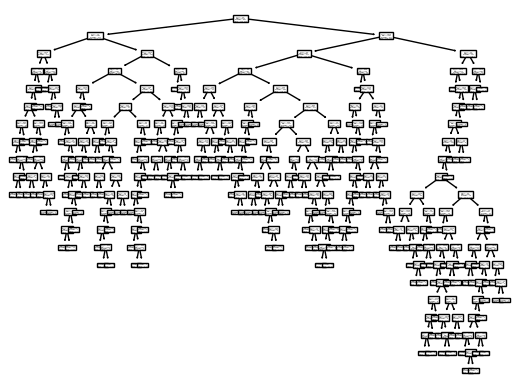

In [31]:
tree.plot_tree(clf)

In [32]:
clf.predict(df_test_in)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Cabin
- Name
- PassengerId
- Ticket


## 5. Avaliação (Evaluation)

## 6. Implementação (Deployment)